In [1]:
import datetime
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [99]:
def in_time(row):
    if row.name.weekday() < 5:
        hour_second = row.name.strftime('%H:%M')
        if (hour_second >= '09:00' and hour_second <= '10:15') or (hour_second >= '10:30' and hour_second <= '11:30') or (hour_second >= '13:30' and hour_second <= '15:00') or (hour_second >= '21:00' and hour_second <= '23:00'):
            return True
        return False
    return False

In [84]:
# df1 = pd.read_hdf('D:/option_data/ht/2023-05-04/rb2306C3700.h5')
# df2 = pd.read_hdf('D:/option_data/ht/2023-05-04/rb2307C3700.h5')
# df3 = pd.read_hdf('D:/option_data/ht/2023-05-04/rb2308C3700.h5')

df1 = pd.read_hdf('Y:/fin_data/2023-04-25/rb2306C3700.h5')
df2 = pd.read_hdf('Y:/fin_data/2023-04-25/rb2307C3700.h5')
df3 = pd.read_hdf('Y:/fin_data/2023-04-25/rb2308C3700.h5')

In [85]:
df1.columns

Index(['TradingDay', 'InstrumentID', 'ExchangeID', 'ExchangeInstID',
       'LastPrice', 'PreSettlementPrice', 'PreClosePrice', 'PreOpenInterest',
       'OpenPrice', 'HighestPrice', 'LowestPrice', 'Volume', 'Turnover',
       'OpenInterest', 'ClosePrice', 'SettlementPrice', 'UpperLimitPrice',
       'LowerLimitPrice', 'PreDelta', 'CurrDelta', 'UpdateTime',
       'UpdateMillisec', 'BidPrice1', 'BidVolume1', 'AskPrice1', 'AskVolume1',
       'BidPrice2', 'BidVolume2', 'AskPrice2', 'AskVolume2', 'BidPrice3',
       'BidVolume3', 'AskPrice3', 'AskVolume3', 'BidPrice4', 'BidVolume4',
       'AskPrice4', 'AskVolume4', 'BidPrice5', 'BidVolume5', 'AskPrice5',
       'AskVolume5', 'AveragePrice', 'ActionDay', 'BandingUpperPrice',
       'BandingLowerPrice'],
      dtype='object')

In [86]:
df1.shape

(18177, 46)

In [87]:
df2.shape

(14835, 46)

In [88]:
df3.shape

(11190, 46)

In [89]:
df1['TradingTime'] = df1.TradingDay + ' ' + df1.UpdateTime + '.' + df1.UpdateMillisec.astype(str)

In [90]:
df1.index = pd.to_datetime(df1.TradingTime, format='%Y%m%d %H:%M:%S.%f')

In [91]:
df2['TradingTime'] = df2.TradingDay + ' ' + df2.UpdateTime + '.' + df2.UpdateMillisec.astype(str)

In [92]:
df2.index = pd.to_datetime(df2.TradingTime, format='%Y%m%d %H:%M:%S.%f')

In [93]:
df3['TradingTime'] = df3.TradingDay + ' ' + df3.UpdateTime + '.' + df3.UpdateMillisec.astype(str)

In [94]:
df3.index = pd.to_datetime(df3.TradingTime, format='%Y%m%d %H:%M:%S.%f')

In [95]:
df = df1.LastPrice.to_frame().merge(df2.LastPrice.to_frame(), how='inner', left_index=True, right_index=True)
df = df.merge(df3.LastPrice.to_frame(), how='inner', left_index=True, right_index=True)

In [96]:
df = df.rename(columns={'LastPrice': 'LastPrice_z'})

In [100]:
df = df[df.apply(in_time, axis=1)]

In [104]:
df.iloc[-2400:-2350]

,LastPrice_x,LastPrice_y,LastPrice_z
TradingTime,,,
2023-04-25 14:43:14.500,81.5,122.0,153.0
2023-04-25 14:43:15.000,81.5,122.0,153.0
2023-04-25 14:43:16.000,81.5,122.0,153.0
2023-04-25 14:43:17.000,83.0,122.0,153.0
2023-04-25 14:43:17.500,83.0,122.0,153.0
2023-04-25 14:43:18.000,83.0,122.0,153.0
2023-04-25 14:43:18.500,83.0,122.0,153.0
2023-04-25 14:43:19.000,83.0,122.0,153.0
2023-04-25 14:43:20.000,83.0,122.0,153.0


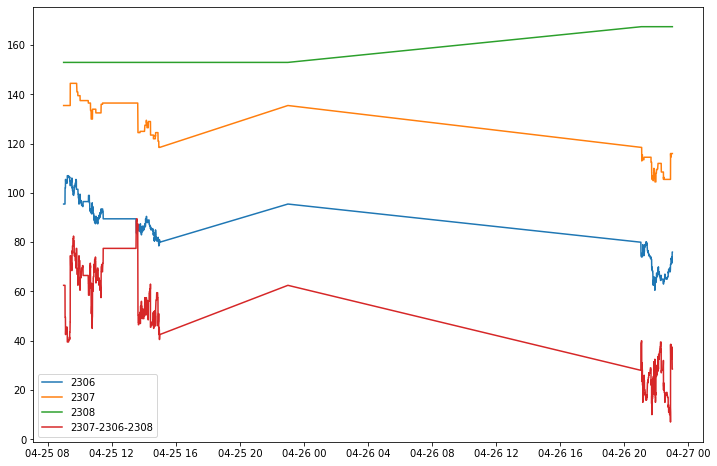

In [102]:
fig = plt.figure(figsize=(12, 8))

plt.plot(df.LastPrice_x, label='2306')
plt.plot(df.LastPrice_y, label='2307')
plt.plot(df.LastPrice_z, label='2308')
# plt.plot(df.LastPrice_y - df.LastPrice_x, label='2307-2306')
# plt.plot(df.LastPrice_y - df.LastPrice_z, label='2307-2308')
plt.plot(df.LastPrice_y * 3 - df.LastPrice_x * 2 - df.LastPrice_z, label='2307-2306-2308')
plt.legend()
# plt.plot()

In [10]:
def in_time(row):
    if row.name.weekday() < 5:
        hour_second = row.name.strftime('%H:%M')
        if (hour_second >= '08:59' and hour_second <= '10:15') or (hour_second >= '10:30' and hour_second <= '11:30') or (hour_second >= '13:30' and hour_second <= '15:00') or (hour_second >= '21:00' and hour_second <= '23:00'):
            return True
        return False
    return False

In [5]:
def in_time(row):
    if row.name.weekday() < 5:
        hour_second = row.name.strftime('%H:%M')
        if (hour_second >= '08:59' and hour_second <= '10:15') or (hour_second >= '10:30' and hour_second <= '11:30') or (hour_second >= '13:30' and hour_second <= '15:00') or hour_second >= '20:59' or hour_second <= '01:01':
            return True
        return False
    return False

In [6]:
_df = pd.read_hdf('D:/code/python/left5/fin/SHFE.al2207P19800.h5')

In [7]:
_df.index = pd.to_datetime(_df.datetime, format='%Y-%m-%d %H:%M:%S.%f')
_df = _df[_df.apply(in_time, axis=1)]

In [113]:
rolling = _df.rolling('60s', min_periods=1)

In [ ]:
rolling.agg(lambda rows: rows[0])
# rolling.agg(lambda rows: rows[-1])

In [53]:
from pandas.tseries.frequencies import to_offset

In [8]:
df = pd.read_hdf('Z:/tq_data/ticks/SHFE.al2306.h5') # SHFE.al2206.h5

In [9]:
df.index = pd.to_datetime(df.datetime, format='%Y-%m-%d %H:%M:%S.%f')

In [5]:
resample_ohlc = df.iloc[30000:50000]['SHFE.al2306.last_price'].resample('D').ohlc(_method='ohlc') # , offset='21H'

In [6]:
resample_ohlc

,open,high,low,close
datetime,,,,
2022-06-22,19285.0,19400.0,19220.0,19400.0
2022-06-23,19400.0,19400.0,19180.0,19215.0
2022-06-24,19215.0,19250.0,18645.0,18770.0


In [8]:
df.iloc[30000:50000]['SHFE.al2306.last_price'].resample('D').ohlc(_method='ohlc')

,open,high,low,close
datetime,,,,
2022-06-22,19285.0,19400.0,19220.0,19400.0
2022-06-23,19400.0,19400.0,19180.0,19215.0
2022-06-24,19215.0,19250.0,18645.0,18770.0


In [47]:
df.iloc[30000:50000]['SHFE.al2206.last_price'].resample('24H').ohlc(_method='ohlc')

,open,high,low,close
datetime,,,,
2021-06-23,18425.0,18450.0,18250.0,18375.0
2021-06-24,18575.0,18600.0,18575.0,18600.0
2021-06-25,18600.0,18680.0,18600.0,18600.0
2021-06-26,18855.0,18855.0,18855.0,18855.0
2021-06-27,NaN,NaN,NaN,NaN
2021-06-28,18855.0,18855.0,18600.0,18600.0


In [60]:
df.iloc[30000:50000]['SHFE.al2206.last_price'].resample('24h', offset='-3h').ohlc(_method='ohlc') # , offset='21H'

,open,high,low,close
datetime,,,,
2021-06-22 21:00:00,18425.0,18450.0,18250.0,18375.0
2021-06-23 21:00:00,18575.0,18600.0,18575.0,18600.0
2021-06-24 21:00:00,18600.0,18680.0,18600.0,18600.0
2021-06-25 21:00:00,18855.0,18855.0,18855.0,18855.0
2021-06-26 21:00:00,NaN,NaN,NaN,NaN
2021-06-27 21:00:00,18855.0,18855.0,18600.0,18600.0
2021-06-28 21:00:00,NaN,NaN,NaN,NaN


In [55]:
# resample_ohlc = df.resample('24H').ohlc(_method='ohlc')
# resample_ohlc.index = resample_ohlc.index + to_offset('21H')

In [56]:
# df.iloc[30000:50000]['SHFE.al2206.last_price'].resample('D', offset='21h')

In [3]:
def in_time(row):
    if row.name.weekday() < 5:
        hour_second = row.name.strftime('%H:%M')
        if (hour_second >= '08:59' and hour_second <= '10:15') or (hour_second >= '10:30' and hour_second <= '11:30') or (hour_second >= '13:30' and hour_second <= '15:00') or hour_second >= '20:59' or hour_second <= '01:01':
            return True
        return False
    return False

In [4]:
def add_time(row):
    if row.name.weekday() < 4:
        return row.name
    elif row.name.hour >= 20:
        return row.name + datetime.timedelta(days=2)
    else:
        return row.name

In [25]:
def in_time(row):
    if row.tradetime.weekday() < 5:
        hour_second = row.tradetime.strftime('%H:%M')
        if (hour_second >= '08:59' and hour_second <= '10:15') or (hour_second >= '10:30' and hour_second <= '11:30') or (hour_second >= '13:30' and hour_second <= '15:00') or hour_second >= '20:59' or hour_second <= '01:01':
            return True
        return False
    return False

In [21]:
def trade_time(row):
    if row.tradetime.weekday() < 4:
        return row.tradetime
    elif row.tradetime.hour >= 20:
        return row.tradetime + datetime.timedelta(days=2)
    else:
        return row.tradetime

In [83]:
df = pd.read_hdf('Z:/tq_data/ticks/SHFE.al2306.h5') # SHFE.al2206.h5

In [84]:
cs = []
for c in df.columns.values:
    cs.append(c.rsplit('.', 1)[-1])
columns = dict(zip(df.columns.values, cs))
df = df.rename(columns=columns)

In [85]:
df.head()

,datetime,datetime_nano,last_price,highest,lowest,average,volume,amount,open_interest,bid_price1,...,ask_price3,ask_volume3,bid_price4,bid_volume4,ask_price4,ask_volume4,bid_price5,bid_volume5,ask_price5,ask_volume5
0,2022-06-15 19:10:33.400000000,1655291433400000000,NaN,NaN,NaN,NaN,0,0.0,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,2022-06-15 20:59:00.500000000,1655297940500000000,NaN,NaN,NaN,NaN,0,0.0,0,19550.0,...,22880.0,100,NaN,0,NaN,0,NaN,0,NaN,0
2,2022-06-15 21:00:01.000000000,1655298001000000000,NaN,NaN,NaN,NaN,0,0.0,0,19555.0,...,21500.0,10,18400.0,1,21630.0,1,18395.0,1,21635.0,1
3,2022-06-15 21:00:01.500000000,1655298001500000000,NaN,NaN,NaN,NaN,0,0.0,0,19555.0,...,21500.0,10,18400.0,1,21630.0,1,18395.0,1,21635.0,1
4,2022-06-15 21:00:03.500000000,1655298003500000000,NaN,NaN,NaN,NaN,0,0.0,0,19555.0,...,21500.0,10,18400.0,1,21630.0,1,18395.0,1,21635.0,1


In [86]:
# df.datetime = pd.to_datetime(df.datetime, format='%Y-%m-%d %H:%M:%S.%f')
df['tradetime'] = pd.to_datetime(df.datetime, format='%Y-%m-%d %H:%M:%S.%f')

In [55]:
# df.tradetime.between_time('0:00', '1:05')

In [70]:
_df = df[(df.tradetime.dt.hour >= 8) | (df.tradetime.dt.hour <= 1)]

In [ ]:
# df.loc[((df.tradetime.dt.dayofweek >= 4) & (df.tradetime.dt.hour >= 20)) | (df.tradetime.dt.dayofweek > 4)]

In [71]:
_df.loc[(_df.tradetime.dt.dayofweek >= 4) & (_df.tradetime.dt.hour >= 20)].tradetime = _df.loc[(_df.tradetime.dt.dayofweek >= 4) & (_df.tradetime.dt.hour >= 20)].tradetime + datetime.timedelta(days=2)
_df.loc[_df.tradetime.dt.dayofweek > 4].tradetime = _df.loc[_df.tradetime.dt.dayofweek > 4].tradetime + datetime.timedelta(days=2)

D:\Software\Python\Python37\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [82]:
_df.loc[_df.tradetime.dt.dayofweek > 4]

,datetime,datetime_nano,last_price,highest,lowest,average,volume,amount,open_interest,bid_price1,...,ask_volume3,bid_price4,bid_volume4,ask_price4,ask_volume4,bid_price5,bid_volume5,ask_price5,ask_volume5,tradetime
13548,2022-06-18 00:00:18.500000000,1655481618500000000,19700.0,19745.0,19700.0,19722.50000,2,1.972250e+05,24,19550.0,...,1,19480.0,4,19950.0,1,19400.0,4,20280.0,1,2022-06-18 00:00:18.500
13549,2022-06-18 00:00:19.000000000,1655481619000000000,19700.0,19745.0,19700.0,19722.50000,2,1.972250e+05,24,19550.0,...,1,19480.0,4,19950.0,1,19400.0,4,20280.0,1,2022-06-18 00:00:19.000
13550,2022-06-18 00:00:19.500000000,1655481619500000000,19700.0,19745.0,19700.0,19722.50000,2,1.972250e+05,24,19550.0,...,1,19480.0,4,20280.0,1,19400.0,4,20535.0,1,2022-06-18 00:00:19.500
13551,2022-06-18 00:00:22.000000000,1655481622000000000,19700.0,19745.0,19700.0,19722.50000,2,1.972250e+05,24,19550.0,...,1,19480.0,4,20280.0,1,19400.0,4,20535.0,1,2022-06-18 00:00:22.000
13552,2022-06-18 00:00:23.500000000,1655481623500000000,19700.0,19745.0,19700.0,19722.50000,2,1.972250e+05,24,19550.0,...,1,19480.0,4,19950.0,1,19400.0,4,20280.0,1,2022-06-18 00:00:23.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550347,2023-04-22 00:59:57.500000000,1682096397500000000,18950.0,19030.0,18875.0,18947.90378,83679,7.927708e+09,263818,18950.0,...,214,18935.0,11,18970.0,2,18930.0,72,18975.0,6,2023-04-22 00:59:57.500
2550348,2023-04-22 00:59:58.000000000,1682096398000000000,18955.0,19030.0,18875.0,18947.90386,83680,7.927803e+09,263818,18950.0,...,2,18935.0,11,18975.0,6,18930.0,72,18980.0,38,2023-04-22 00:59:58.000
2550349,2023-04-22 00:59:58.500000000,1682096398500000000,18955.0,19030.0,18875.0,18947.90386,83680,7.927803e+09,263818,18950.0,...,214,18935.0,11,18970.0,2,18930.0,70,18975.0,6,2023-04-22 00:59:58.500
2550350,2023-04-22 00:59:59.000000000,1682096399000000000,18955.0,19030.0,18875.0,18947.90394,83681,7.927898e+09,263818,18950.0,...,214,18935.0,11,18970.0,2,18930.0,70,18975.0,6,2023-04-22 00:59:59.000


In [39]:
# _df = df[df.apply(in_time, axis=1)]

In [60]:
_df.index = _df.tradetime

In [61]:
resample_ohlc = _df['last_price'].resample('1Min', closed='left', label='right').ohlc(_method='ohlc')

In [68]:
_df.loc['2023-03-11']

,datetime,datetime_nano,last_price,highest,lowest,average,volume,amount,open_interest,bid_price1,...,ask_volume3,bid_price4,bid_volume4,ask_price4,ask_volume4,bid_price5,bid_volume5,ask_price5,ask_volume5,tradetime
tradetime,,,,,,,,,,,,,,,,,,,,,
2023-03-11 00:00:01.500,2023-03-11 00:00:01.500000000,1678464001500000000,18270.0,18315.0,18155.0,18224.13974,14327,1.305486e+09,75482,18265.0,...,24,18250.0,19,18285.0,6,18245.0,6,18290.0,12,2023-03-11 00:00:01.500
2023-03-11 00:00:04.000,2023-03-11 00:00:04.000000000,1678464004000000000,18270.0,18315.0,18155.0,18224.13974,14327,1.305486e+09,75482,18265.0,...,6,18250.0,19,18290.0,12,18245.0,6,18295.0,6,2023-03-11 00:00:04.000
2023-03-11 00:00:05.000,2023-03-11 00:00:05.000000000,1678464005000000000,18270.0,18315.0,18155.0,18224.13974,14327,1.305486e+09,75482,18265.0,...,6,18250.0,19,18290.0,12,18245.0,6,18295.0,6,2023-03-11 00:00:05.000
2023-03-11 00:00:08.000,2023-03-11 00:00:08.000000000,1678464008000000000,18270.0,18315.0,18155.0,18224.13974,14327,1.305486e+09,75482,18265.0,...,6,18250.0,19,18290.0,12,18245.0,6,18295.0,6,2023-03-11 00:00:08.000
2023-03-11 00:00:08.500,2023-03-11 00:00:08.500000000,1678464008500000000,18270.0,18315.0,18155.0,18224.13974,14327,1.305486e+09,75482,18265.0,...,24,18250.0,19,18285.0,6,18245.0,6,18290.0,12,2023-03-11 00:00:08.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-11 00:59:53.500,2023-03-11 00:59:53.500000000,1678467593500000000,18270.0,18315.0,18155.0,18225.20344,14820,1.350488e+09,75526,18265.0,...,1,18245.0,7,18290.0,12,18240.0,10,18295.0,1,2023-03-11 00:59:53.500
2023-03-11 00:59:54.500,2023-03-11 00:59:54.500000000,1678467594500000000,18270.0,18315.0,18155.0,18225.20646,14821,1.350579e+09,75525,18265.0,...,1,18245.0,5,18290.0,10,18240.0,10,18295.0,1,2023-03-11 00:59:54.500
2023-03-11 00:59:55.500,2023-03-11 00:59:55.500000000,1678467595500000000,18270.0,18315.0,18155.0,18225.20646,14821,1.350579e+09,75525,18255.0,...,1,18240.0,10,18290.0,10,18235.0,1,18295.0,1,2023-03-11 00:59:55.500


In [9]:
# df.index = pd.to_datetime(df.datetime, format='%Y-%m-%d %H:%M:%S.%f')

In [26]:
# _df = df[df.apply(in_time, axis=1)]

In [27]:
# _df['tradetime'] = _df.apply(trade_time, axis=1)

D:\Software\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
# _df = df[df.apply(in_time, axis=1)]

In [78]:
# _df['dayofweek'] = _df.apply(add_time, axis=1)

D:\Software\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
_df.loc['2023-03-10'].iloc[700:]

,datetime,datetime_nano,SHFE.al2306.last_price,SHFE.al2306.highest,SHFE.al2306.lowest,SHFE.al2306.average,SHFE.al2306.volume,SHFE.al2306.amount,SHFE.al2306.open_interest,SHFE.al2306.bid_price1,...,SHFE.al2306.ask_volume3,SHFE.al2306.bid_price4,SHFE.al2306.bid_volume4,SHFE.al2306.ask_price4,SHFE.al2306.ask_volume4,SHFE.al2306.bid_price5,SHFE.al2306.bid_volume5,SHFE.al2306.ask_price5,SHFE.al2306.ask_volume5,dayofweek
datetime,,,,,,,,,,,,,,,,,,,,,
2023-03-10 00:54:22.500,2023-03-10 00:54:22.500000000,1678380862500000000,18515.0,18570.0,18465.0,18529.75282,8880,8.227210e+08,69109,18510.0,...,15,18495.0,24,18535.0,7,18490.0,30,18540.0,18,2023-03-10 00:54:22.500
2023-03-10 00:54:23.000,2023-03-10 00:54:23.000000000,1678380863000000000,18515.0,18570.0,18465.0,18529.75282,8880,8.227210e+08,69109,18510.0,...,15,18495.0,24,18535.0,7,18490.0,30,18540.0,18,2023-03-10 00:54:23.000
2023-03-10 00:54:26.000,2023-03-10 00:54:26.000000000,1678380866000000000,18515.0,18570.0,18465.0,18529.75282,8880,8.227210e+08,69109,18515.0,...,15,18500.0,28,18535.0,7,18495.0,24,18540.0,18,2023-03-10 00:54:26.000
2023-03-10 00:54:27.000,2023-03-10 00:54:27.000000000,1678380867000000000,18515.0,18570.0,18465.0,18529.75282,8880,8.227210e+08,69109,18515.0,...,15,18500.0,28,18535.0,7,18495.0,24,18540.0,18,2023-03-10 00:54:27.000
2023-03-10 00:54:27.500,2023-03-10 00:54:27.500000000,1678380867500000000,18515.0,18570.0,18465.0,18529.75282,8880,8.227210e+08,69109,18515.0,...,15,18500.0,28,18535.0,7,18495.0,24,18540.0,18,2023-03-10 00:54:27.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-10 23:59:45.500,2023-03-10 23:59:45.500000000,1678463985500000000,18270.0,18315.0,18155.0,18224.13654,14326,1.305395e+09,75482,18265.0,...,24,18250.0,19,18285.0,8,18245.0,8,18290.0,12,2023-03-12 23:59:45.500
2023-03-10 23:59:51.500,2023-03-10 23:59:51.500000000,1678463991500000000,18270.0,18315.0,18155.0,18224.13974,14327,1.305486e+09,75482,18265.0,...,8,18250.0,19,18290.0,12,18245.0,8,18295.0,4,2023-03-12 23:59:51.500
2023-03-10 23:59:52.000,2023-03-10 23:59:52.000000000,1678463992000000000,18270.0,18315.0,18155.0,18224.13974,14327,1.305486e+09,75482,18265.0,...,8,18250.0,19,18290.0,12,18245.0,8,18295.0,4,2023-03-12 23:59:52.000


In [80]:
_df.index = _df.dayofweek

In [81]:
resample_ohlc = _df['SHFE.al2306.last_price'].resample('1Min', closed='left', label='right').ohlc(_method='ohlc')

In [82]:
resample_ohlc.loc['2023-04-27 21']

,open,high,low,close
dayofweek,,,,
2023-04-27 21:00:00,18415.0,18415.0,18415.0,18415.0
2023-04-27 21:01:00,18420.0,18475.0,18405.0,18465.0
2023-04-27 21:02:00,18465.0,18465.0,18430.0,18440.0
2023-04-27 21:03:00,18440.0,18445.0,18430.0,18435.0
2023-04-27 21:04:00,18430.0,18440.0,18410.0,18415.0
2023-04-27 21:05:00,18415.0,18450.0,18410.0,18440.0
2023-04-27 21:06:00,18440.0,18445.0,18430.0,18445.0
2023-04-27 21:07:00,18445.0,18460.0,18440.0,18455.0
2023-04-27 21:08:00,18455.0,18465.0,18450.0,18465.0


In [45]:
dfDay = resample_ohlc.resample('24H', closed='left', label='right', offset='21H').agg({
#         'Contract': 'first',
        'open': 'first',
        'high': 'max',
        'low': 'min',
        'close': 'last',
#         'Volume': 'sum',
#         'OpenInterest': 'sum'
    }).dropna()

In [46]:
dfDay.iloc[-50:]

,open,high,low,close
tradetime,,,,
2023-03-01 21:00:00,18440.0,18705.0,18400.0,18680.0
2023-03-02 21:00:00,18750.0,18750.0,18585.0,18620.0
2023-03-03 21:00:00,18585.0,18770.0,18510.0,18760.0
2023-03-04 21:00:00,18740.0,18760.0,18660.0,18710.0
2023-03-06 21:00:00,18650.0,18755.0,18520.0,18575.0
2023-03-07 21:00:00,18545.0,18700.0,18510.0,18585.0
2023-03-08 21:00:00,18560.0,18575.0,18420.0,18520.0
2023-03-09 21:00:00,18520.0,18590.0,18440.0,18490.0
2023-03-10 21:00:00,18485.0,18570.0,18230.0,18270.0
